# Practice Exercise: Cleaning data & Transforming columns/features

## Context:
- The data is based on real anonymized Czech bank transactions and account info.
- We'll be focusing on practicing the data cleaning, columns transformations, and other techniques that we've learned in the course. 
- But here is the original task description of the dataset publishers:

*The bank wants to improve their services. For instance, the bank managers have only vague idea, who is a good client (whom to offer some additional services)   and who is a bad client (whom to watch carefully to minimize the bank losses). Fortunately, the bank stores data about their clients, the accounts (transactions within several months), the loans already granted, the credit cards issued. The bank managers hope to improve their understanding of customers and seek specific actions to improve services.*

- We've made minor changes on the data to fit this exercise, such as changing the column names. Check out the original source if you are interested in using this data for other purposes (https://data.world/lpetrocelli/czech-financial-dataset-real-anonymized-transactions)

## Dataset Description:

We'll work on three datasets (in three separate csv files):

  - **account**: each record describes static characteristics of an account
  - **transaction**: each record describes one transaction on an account
  - **district**: each record describes demographic characteristics of a district
  
In reality, the organizations like banks often have data stored in multiple datasets. Assume we want to study the transactional level data, we'll need to combine these three datasets together to have transactions data with account and district data.

## Objective: 
   - Examine/clean the individual dataset
   - Combine them into a single dataset, which is subject to more cleaning
   - Create new columns based on existing columns

By the end, the new dataset is ready for more analysis.

### 1. Import the libraries

In [1]:
import pandas as pd

### 2. Import the data from three csv files as DataFrames `account`, `district`, `trans`
Hint: 
- the `read_csv` function can automatically infer and load zip file, read its documentation of parameter `compression` if you are interested in details
- you may ignore the warning when reading the `trans.csv.zip` file. It is optional to follow the warning instructions to remove it.

In [3]:
account = pd.read_csv('account.csv')
district = pd.read_csv('district.csv')
trans = pd.read_csv('trans.csv')

C:\Users\jakeb\AppData\Local\Temp\ipykernel_22100\1315527715.py:3: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  trans = pd.read_csv('trans.csv')


### 3. Look at the info summary, head of each DataFrame

In [5]:
## Account

print(account.head(1))
print(account.describe())
account.info()

   account_id  district_id           frequency account_open_date  client_id
0         576           55  MONTHLY STATEMENTS        1993-01-01        692
         account_id  district_id     client_id
count   4500.000000  4500.000000   4500.000000
mean    2786.067556    37.310444   3381.096444
std     2313.811984    25.177217   2839.605215
min        1.000000     1.000000      1.000000
25%     1182.750000    13.000000   1424.750000
50%     2368.000000    38.000000   2861.000000
75%     3552.250000    60.000000   4287.250000
max    11382.000000    77.000000  13998.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   account_id         4500 non-null   int64 
 1   district_id        4500 non-null   int64 
 2   frequency          4500 non-null   object
 3   account_open_date  4500 non-null   object
 4   client_id          4500 non-null

In [6]:
## District

print(district.head(1))
print(district.describe())
district.info()

   district_id district_name  region  population  average_salary  \
0            1   Hl.m. Praha  Prague     1204953         12541.0   

   unemployment_rate  num_committed_crimes  
0               0.43               99107.0  
       district_id    population  average_salary  unemployment_rate  \
count    76.000000  7.600000e+01       66.000000          66.000000   
mean     38.500000  1.336920e+05     8984.378788           3.836364   
std      22.083176  1.378127e+05      782.234172           1.839614   
min       1.000000  4.282100e+04     8110.000000           0.430000   
25%      19.750000  8.472500e+04     8441.750000           2.455000   
50%      38.500000  1.083910e+05     8755.500000           3.655000   
75%      57.250000  1.382770e+05     9298.250000           4.670000   
max      76.000000  1.204953e+06    12541.000000           9.400000   

       num_committed_crimes  
count             67.000000  
mean            5164.567164  
std            12069.628890  
min          

In [7]:
## Trans

print(trans.head(1))
print(trans.describe())
trans.info()

   trans_id  account_id        date    type  operation_type  amount  balance  \
0    695247        2378  1993-01-01  CREDIT  CREDIT IN CASH   700.0    700.0   

  description partner_bank  partner_account  
0         NaN          NaN              NaN  
           trans_id    account_id        amount       balance  partner_account
count  1.056320e+06  1.056320e+06  1.056320e+06  1.056320e+06     2.953890e+05
mean   1.335311e+06  2.936867e+03  5.924146e+03  3.851833e+04     4.567092e+07
std    1.227487e+06  2.477345e+03  9.522735e+03  2.211787e+04     3.066340e+07
min    1.000000e+00  1.000000e+00  0.000000e+00 -4.112570e+04     0.000000e+00
25%    4.302628e+05  1.204000e+03  1.359000e+02  2.240250e+04     1.782858e+07
50%    8.585065e+05  2.434000e+03  2.100000e+03  3.314340e+04     4.575095e+07
75%    2.060979e+06  3.660000e+03  6.800000e+03  4.960362e+04     7.201341e+07
max    3.682987e+06  1.138200e+04  8.740000e+04  2.096370e+05     9.999420e+07
<class 'pandas.core.frame.DataFrame'

### 4. Check for the unique values and their counts in each column for the three DataFrames

In [9]:
account.nunique()

account_id           4500
district_id            77
frequency               3
account_open_date    1535
client_id            4500
dtype: int64

In [10]:
district.nunique()

district_id             76
district_name           76
region                   8
population              76
average_salary          65
unemployment_rate       63
num_committed_crimes    66
dtype: int64

In [11]:
trans.nunique()

trans_id           1056320
account_id            4500
date                  2191
type                     2
operation_type           5
amount               40400
balance             542739
description              8
partner_bank            13
partner_account       7665
dtype: int64

### 5. Check for duplicates in the three DataFrames

In [13]:
account[account.duplicated()]
account.duplicated().value_counts()

False    4500
Name: count, dtype: int64

In [14]:
district[district.duplicated()]
district.duplicated().value_counts()

False    76
Name: count, dtype: int64

In [15]:
trans[trans.duplicated()]
trans.duplicated().value_counts()

False    1056320
Name: count, dtype: int64

### 6. Convert column `account_open_date` in `account` and column `date` in `trans` into datetime dtypes

In [17]:
account['account_open_date'] = pd.to_datetime(account['account_open_date'])

In [18]:
trans['date'] = pd.to_datetime(trans['date'])

### 7. Convert the columns `region` and `district_name` in `district` to all uppercase

In [20]:
district[['region']]

,region
0,Prague
1,central Bohemia
2,central Bohemia
3,central Bohemia
4,central Bohemia
...,...
71,north Moravia
72,north Moravia
73,north Moravia
74,north Moravia


In [21]:
district['region'] = district['region'].str.upper()
district['district_name'] = district['district_name'].str.upper()

In [22]:
district[['district_name']]

,district_name
0,HL.M. PRAHA
1,BENESOV
2,BEROUN
3,KLADNO
4,KOLIN
...,...
71,OLOMOUC
72,OPAVA
73,OSTRAVA - MESTO
74,PREROV


### 8. Check for missing data by columns in `account` using the `isna` method

In [24]:
account.isna().value_counts()

account_id  district_id  frequency  account_open_date  client_id
False       False        False      False              False        4500
Name: count, dtype: int64

### 9. Check for missing data by columns in `district` using the `isna` method

In [26]:
district.isna().value_counts()

district_id  district_name  region  population  average_salary  unemployment_rate  num_committed_crimes
False        False          False   False       False           False              False                   48
                                                                                   True                     9
                                                                True               False                    9
                                                True            False              False                    9
                                                                True               False                    1
Name: count, dtype: int64

`district` has numeric features that could have relationships with each other. Let's use iterative imputation on them.

#### Use `IterativeImputer` in `sklearn` to impute based on columns `population`, `average_salary`, `unemployment_rate`, `num_committed_crimes`

##### Import libraries

In [30]:
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

##### Build a list of columns that will be used for imputation, which are `population`, `average_salary`, `unemployment_rate`, `num_committed_crimes`
These are the columns that might be related to each other 

In [32]:
impu_list = district[['population','average_salary','unemployment_rate','num_committed_crimes']]
impu_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76 entries, 0 to 75
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   population            76 non-null     int64  
 1   average_salary        66 non-null     float64
 2   unemployment_rate     66 non-null     float64
 3   num_committed_crimes  67 non-null     float64
dtypes: float64(3), int64(1)
memory usage: 2.5 KB


##### Create `IterativeImputer` object and set its `min_value` and `max_value` parameters to be the minumum and maximum of corresponding columns

In [34]:
iter_imp = IterativeImputer(min_value=impu_list.min(), max_value=impu_list.max())

##### Apply the imputer to fit and transform the columns to an imputed NumPy array

In [36]:
imputed_num = iter_imp.fit_transform(impu_list)

##### Assign the imputed array back to the original DataFrame's columns

In [38]:
district[['population','average_salary','unemployment_rate','num_committed_crimes']] = imputed_num

##### Double check that the columns are imputed

In [182]:
district[['population','average_salary','unemployment_rate','num_committed_crimes']].isna().value_counts()

population  average_salary  unemployment_rate  num_committed_crimes
False       False           False              False                   76
Name: count, dtype: int64

### 10. Check for missing data by columns in `trans` using the `isna` method

In [42]:
trans.isna().value_counts()

trans_id  account_id  date   type   operation_type  amount  balance  description  partner_bank  partner_account
False     False       False  False  False           False   False    True         True          True               420407
                                                                     False        False         False              230465
                                    True            False   False    False        True          True               183114
                                    False           False   False    False        True          True               157410
                                                                     True         False         False               43043
                                                                                  True          False               18431
                                                                     False        True          False                3450
Name: count, dtype: int64

#### Divide the columns into numeric columns and categorical columns, then use the `fillna` method to fill numeric columns with -999, fill categorical columns with 'UNKNOWN'

In [44]:
trans_numeric = trans.select_dtypes(include = 'number').columns
trans_numeric

Index(['trans_id', 'account_id', 'amount', 'balance', 'partner_account'], dtype='object')

In [45]:
trans_cat = trans.select_dtypes(exclude = 'number').columns
trans_cat

Index(['date', 'type', 'operation_type', 'description', 'partner_bank'], dtype='object')

In [46]:
trans[trans_numeric] = trans[trans_numeric].fillna(-999)
trans[trans_cat] = trans[trans_cat].fillna('UNKNOWN')

In [176]:
trans[trans_numeric].head(20)

,trans_id,account_id,amount,balance,partner_account
0,695247,2378,700.0,700.0,-999.0
1,171812,576,900.0,900.0,-999.0
2,207264,704,1000.0,1000.0,-999.0
3,1117247,3818,600.0,600.0,-999.0
4,579373,1972,400.0,400.0,-999.0
5,771035,2632,1100.0,1100.0,-999.0
6,452728,1539,600.0,600.0,-999.0
7,725751,2484,1100.0,1100.0,-999.0
8,497211,1695,200.0,200.0,-999.0
9,232960,793,800.0,800.0,-999.0


### 11. Check for outliers in `district` using the `describe` method, then look at the histograms of the suspicious columns

In [48]:
district.describe

<bound method NDFrame.describe of     district_id    district_name           region  population  average_salary  \
0             1      HL.M. PRAHA           PRAGUE   1204953.0    12541.000000   
1             2          BENESOV  CENTRAL BOHEMIA     88884.0     8813.969500   
2             3           BEROUN  CENTRAL BOHEMIA     75232.0     8980.000000   
3             4           KLADNO  CENTRAL BOHEMIA    149893.0     9753.000000   
4             5            KOLIN  CENTRAL BOHEMIA     95616.0     9307.000000   
..          ...              ...              ...         ...             ...   
71           72          OLOMOUC    NORTH MORAVIA    226122.0     9333.878734   
72           73            OPAVA    NORTH MORAVIA    182027.0     8746.000000   
73           74  OSTRAVA - MESTO    NORTH MORAVIA    323870.0    10673.000000   
74           75           PREROV    NORTH MORAVIA    138032.0     8819.000000   
75           76          SUMPERK    NORTH MORAVIA    127369.0     8369.0000

array([[<Axes: title={'center': 'district_id'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'average_salary'}>,
        <Axes: title={'center': 'unemployment_rate'}>],
       [<Axes: title={'center': 'num_committed_crimes'}>, <Axes: >]],
      dtype=object)

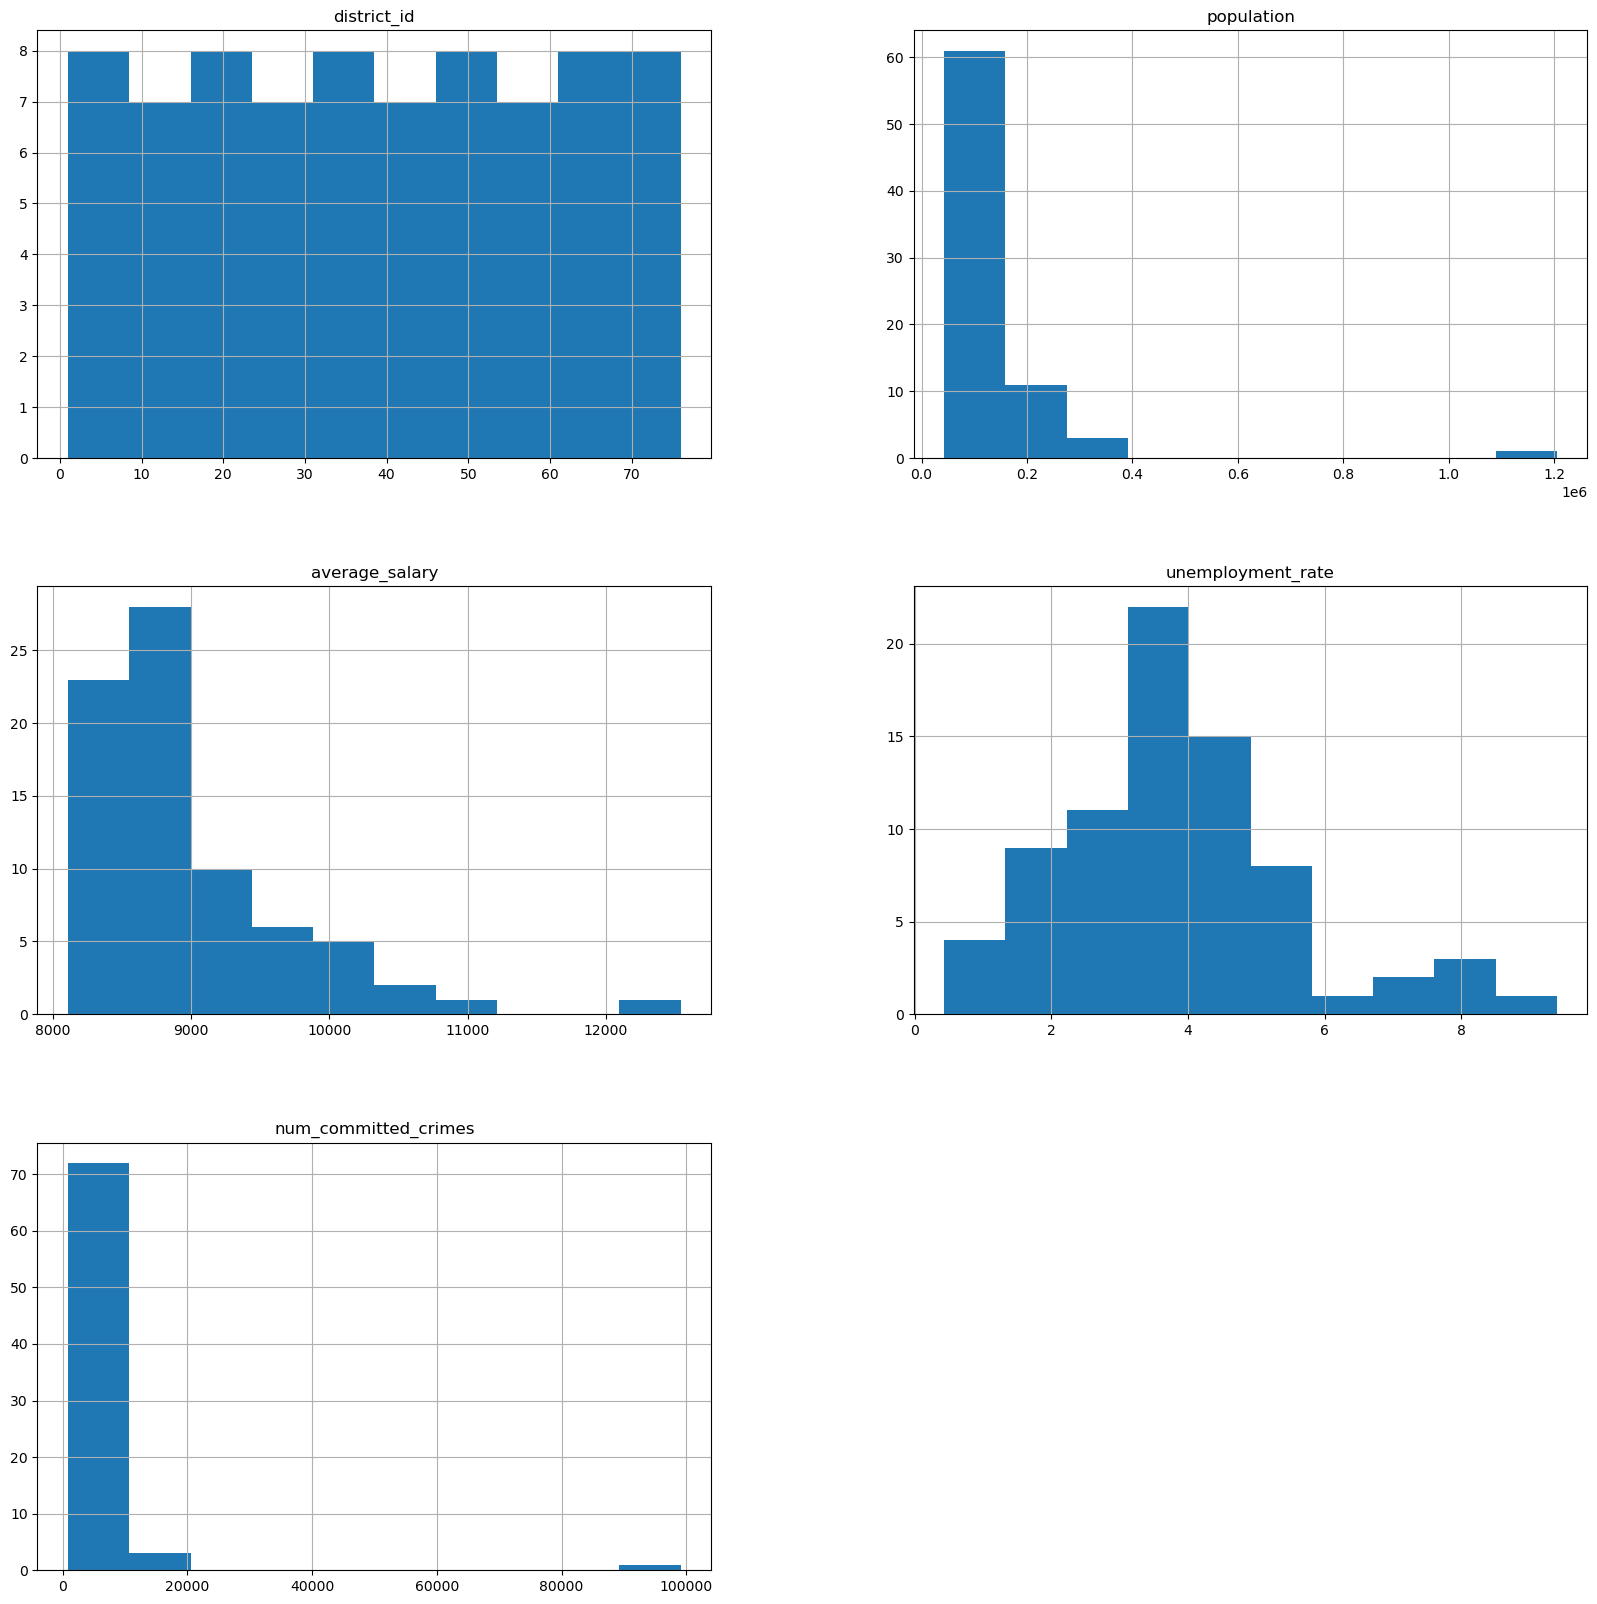

In [49]:
district.hist(figsize=(20,20))

## Suspect 2 of 3 of these graphs to have outliars
## population, average_salary, num_committed_crimes
## Going to explore these further below

#### Explore the outliers in the dataset

<Axes: >

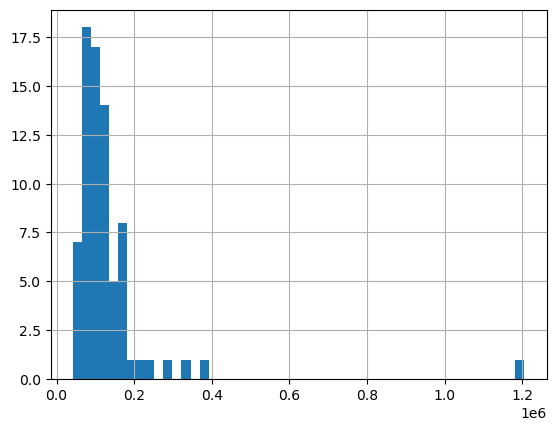

In [52]:
## Notice the large gap at the end
district['population'].hist(bins = 50)

In [53]:
# Lets view the actual data. Using the sort_values we learned earlier we can sort the data by the population in decending order, 
# giving us the largest data first with their districts
# District 1 seems to have a very unporportional number of population
district[['district_id','population']].sort_values(by='population', ascending = False)

,district_id,population
0,1,1204953.0
53,54,387570.0
73,74,323870.0
69,70,285387.0
67,68,228848.0
...,...,...
12,13,53921.0
18,19,51428.0
30,31,51313.0
28,29,45714.0


<Axes: >

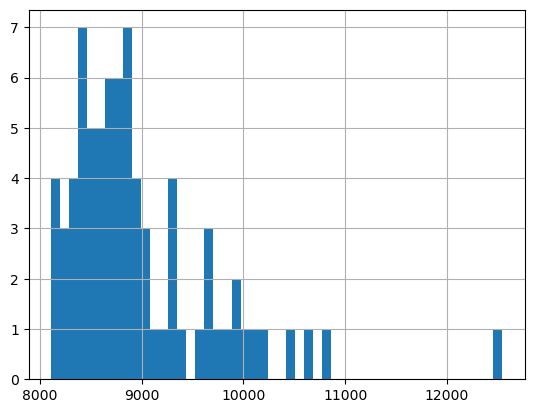

In [54]:
## Notice the large gap at the end
district['average_salary'].hist(bins = 50)

In [55]:
## District 1 has a higher average_salary. 
## This combined with the population could indicate district 1 to be a high population center
district[['district_id','average_salary']].sort_values(by='average_salary', ascending = False)

,district_id,average_salary
0,1,12541.0
25,26,10787.0
73,74,10673.0
38,39,10446.0
69,70,10177.0
...,...,...
48,49,8208.0
49,50,8187.0
68,69,8173.0
16,17,8114.0


<Axes: >

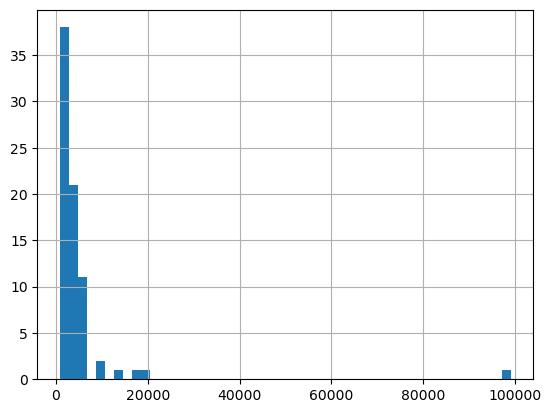

In [56]:
district['num_committed_crimes'].hist(bins = 50)

In [57]:
## Appears district 1 has a large number of committed crimes 
## This combined with the number of population and average salary could point towards this not being an error but a large population center, such as a city
## Thus explaining why there is such a large outliar compared to the other districts which might be less pop dense.
district[['district_id','num_committed_crimes']].sort_values(by='num_committed_crimes', ascending = False)

,district_id,num_committed_crimes
0,1,99107.000000
53,54,18696.000000
73,74,18347.000000
67,68,12703.935555
69,70,10108.000000
...,...,...
21,22,1117.000000
18,19,1099.000000
48,49,888.000000
68,69,888.000000


#### Appears district 1 has a large population, average-salary, and num of crimes
#### This leads me to believe that district 1 is a dense population center and an outliar compared to the rest of the data

### 12. Check for outliers in `trans` using the `describe` method, then look at the histograms of the suspicious columns

In [60]:
trans.describe

<bound method NDFrame.describe of          trans_id  account_id       date    type  operation_type  amount  \
0          695247        2378 1993-01-01  CREDIT  CREDIT IN CASH   700.0   
1          171812         576 1993-01-01  CREDIT  CREDIT IN CASH   900.0   
2          207264         704 1993-01-01  CREDIT  CREDIT IN CASH  1000.0   
3         1117247        3818 1993-01-01  CREDIT  CREDIT IN CASH   600.0   
4          579373        1972 1993-01-02  CREDIT  CREDIT IN CASH   400.0   
...           ...         ...        ...     ...             ...     ...   
1056315   3626622        2906 1998-12-31  CREDIT         UNKNOWN    62.3   
1056316   3627616        2935 1998-12-31  CREDIT         UNKNOWN    81.3   
1056317   3625403        2869 1998-12-31  CREDIT         UNKNOWN    60.2   
1056318   3626683        2907 1998-12-31  CREDIT         UNKNOWN   107.5   
1056319   3626540        2902 1998-12-31  CREDIT         UNKNOWN   164.1   

         balance      description partner_bank  partn

#### Explore the outliers in the dataset

array([[<Axes: title={'center': 'trans_id'}>,
        <Axes: title={'center': 'account_id'}>],
       [<Axes: title={'center': 'date'}>,
        <Axes: title={'center': 'amount'}>],
       [<Axes: title={'center': 'balance'}>,
        <Axes: title={'center': 'partner_account'}>]], dtype=object)

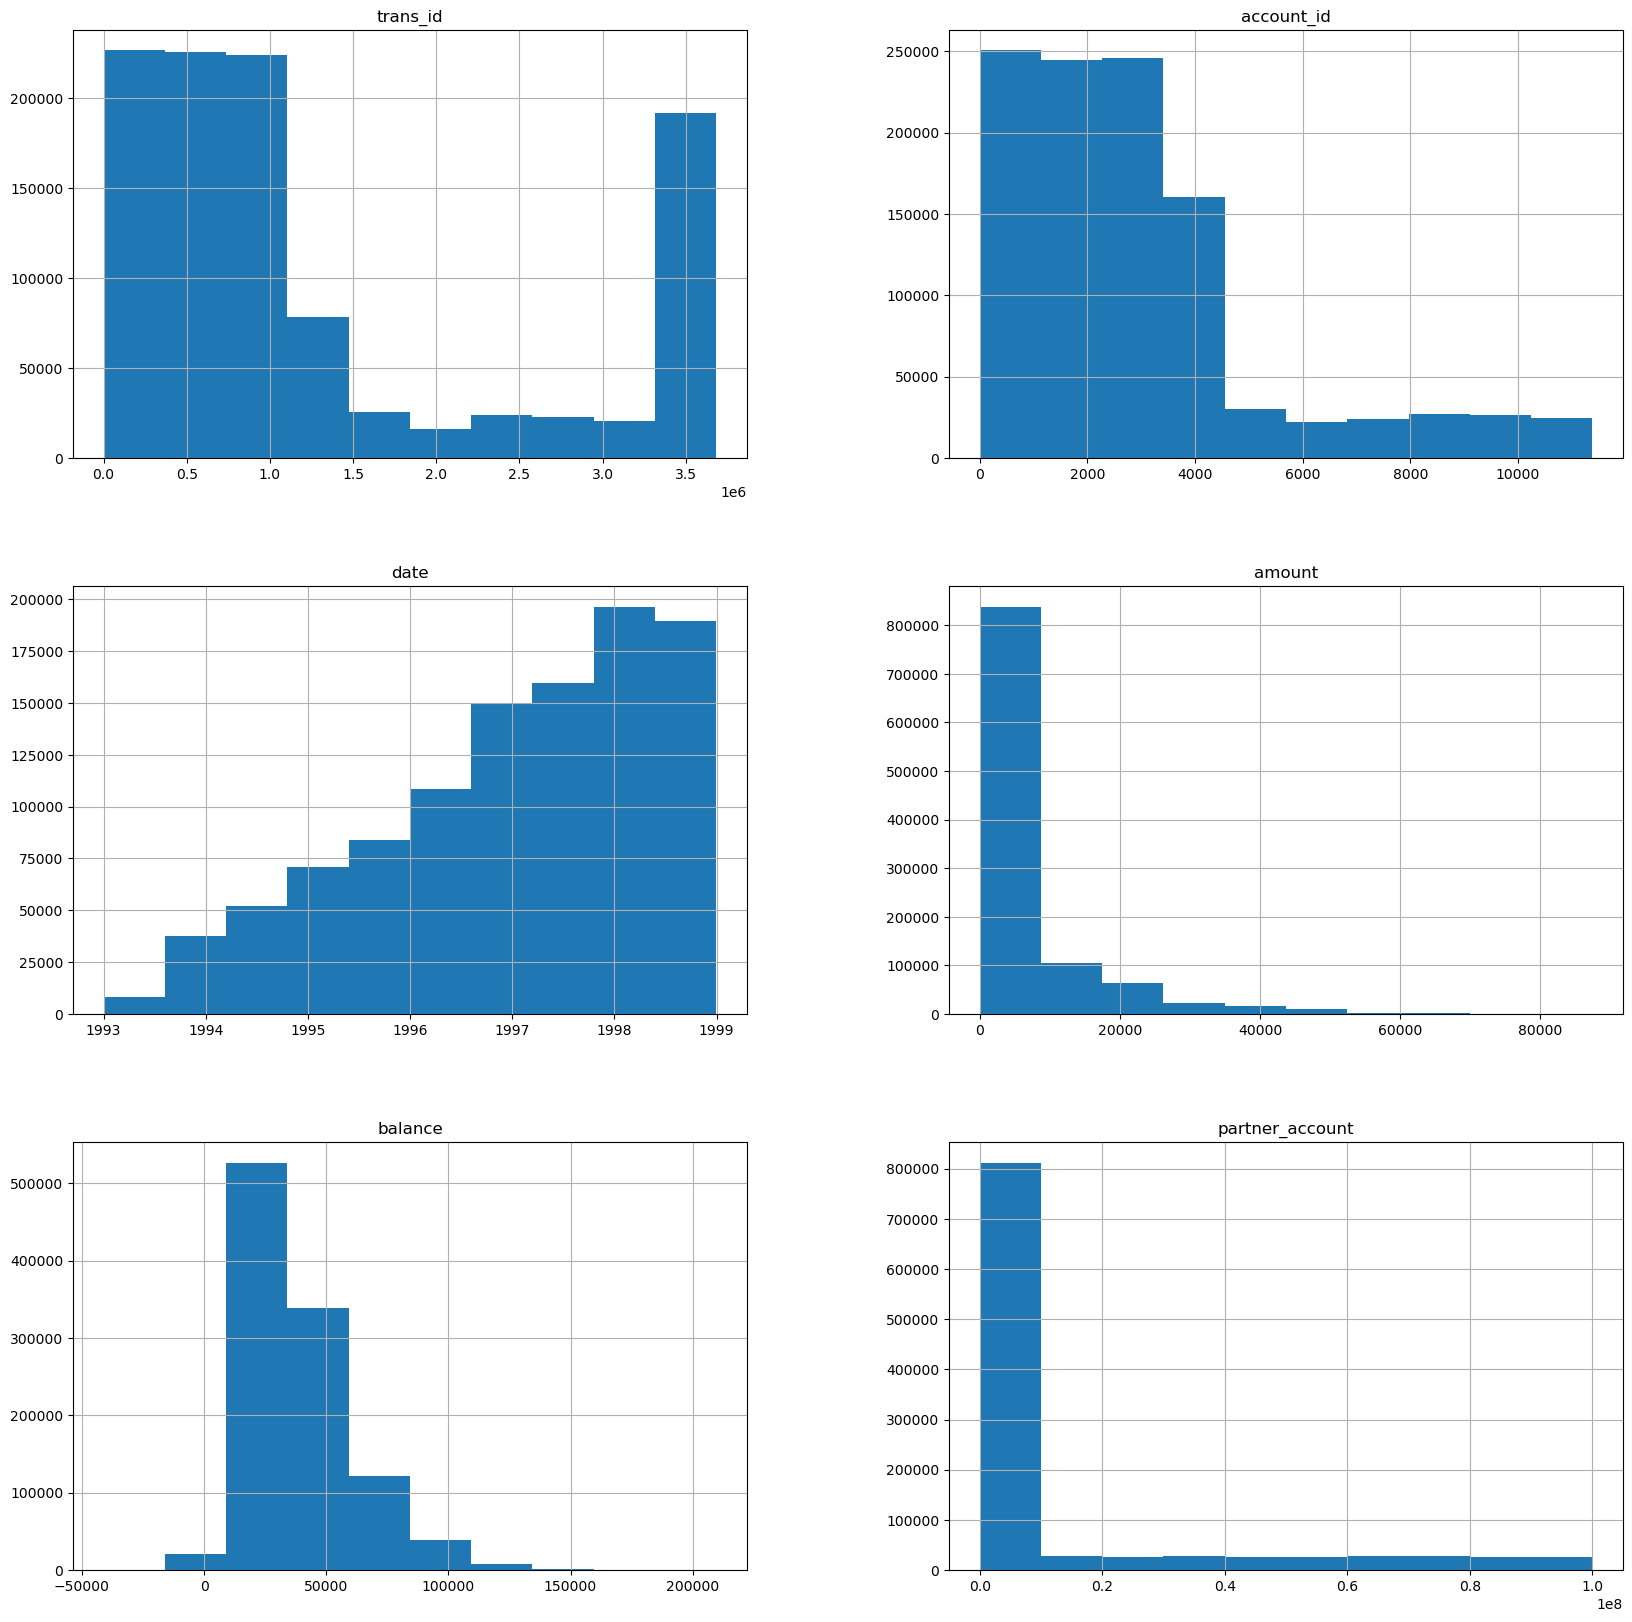

In [62]:
trans.hist(figsize=(20,20))

#### amount seems the most suspicious to me. There is a disporportinate number of low number transactions.
#### Though this might be due to there just being small transactions for common users

In [64]:
trans[['trans_id','amount']].sort_values(by='amount', ascending = True)

,trans_id,amount
796237,3507085,0.0
83396,3455961,0.0
584641,3451866,0.0
108452,3451376,0.0
793200,3456218,0.0
...,...,...
891095,1170721,81900.0
892659,1207200,85800.0
335550,855512,86400.0
880698,1306770,87300.0


In [65]:
trans['amount'].value_counts(ascending = False)

amount
14.6       144098
30.0         8495
100.0        5082
1200.0       4710
1800.0       4705
            ...  
2837.0          1
32650.0         1
31306.0         1
21221.0         1
449.5           1
Name: count, Length: 40400, dtype: int64

In [66]:
trans[['partner_account','amount']].sort_values(by='amount', ascending = True)

,partner_account,amount
796237,-999.0,0.0
83396,-999.0,0.0
584641,-999.0,0.0
108452,-999.0,0.0
793200,-999.0,0.0
...,...,...
891095,-999.0,81900.0
892659,-999.0,85800.0
335550,-999.0,86400.0
880698,-999.0,87300.0


In [67]:
trans['partner_account'].value_counts(ascending = False)

partner_account
-999.0         760931
 0.0            21881
 66487163.0       140
 13943797.0       130
 95437645.0        95
                ...  
 78677373.0         1
 54632151.0         1
 5624032.0          1
 58251345.0         1
 74396675.0         1
Name: count, Length: 7666, dtype: int64

The DataFrame `account` doesn't have any columns that could have outliers, so we are not exploring it.

### 13. Merge (left join) `account` and `district` into a new DataFrame called `account_district` using their common columns

In [70]:
account.columns

Index(['account_id', 'district_id', 'frequency', 'account_open_date',
       'client_id'],
      dtype='object')

In [71]:
district.columns

Index(['district_id', 'district_name', 'region', 'population',
       'average_salary', 'unemployment_rate', 'num_committed_crimes'],
      dtype='object')

In [72]:
trans.columns

Index(['trans_id', 'account_id', 'date', 'type', 'operation_type', 'amount',
       'balance', 'description', 'partner_bank', 'partner_account'],
      dtype='object')

In [73]:
account_district = pd.merge(left=district, right=account,on='district_id',how = 'left')

### 14. Check the information summary of `account_district`, any missing data?

In [75]:
account_district.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4460 entries, 0 to 4459
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   district_id           4460 non-null   int64         
 1   district_name         4460 non-null   object        
 2   region                4460 non-null   object        
 3   population            4460 non-null   float64       
 4   average_salary        4460 non-null   float64       
 5   unemployment_rate     4460 non-null   float64       
 6   num_committed_crimes  4460 non-null   float64       
 7   account_id            4460 non-null   int64         
 8   frequency             4460 non-null   object        
 9   account_open_date     4460 non-null   datetime64[ns]
 10  client_id             4460 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(3), object(3)
memory usage: 383.4+ KB


#### Look at the rows with missing data in `account_district`

In [77]:
account_district.isna().value_counts()

district_id  district_name  region  population  average_salary  unemployment_rate  num_committed_crimes  account_id  frequency  account_open_date  client_id
False        False          False   False       False           False              False                 False       False      False              False        4460
Name: count, dtype: int64

#### Use `SimpleImputer` from `sklearn` to impute the missing data in columns `population`, `average_salary`, `unemployment_rate`, `num_committed_crimes` with their means

In [79]:
impu_list = account_district[['population', 'average_salary', 'unemployment_rate', 'num_committed_crimes']]

In [80]:
# Step 1
simple_imp_min = SimpleImputer(strategy= 'mean')

In [81]:
# Step 2
imputer_num = simple_imp_min.fit_transform(impu_list)

In [82]:
account_district[['population', 'average_salary', 'unemployment_rate', 'num_committed_crimes']] = imputer_num

In [83]:
account_district.isna().value_counts()

district_id  district_name  region  population  average_salary  unemployment_rate  num_committed_crimes  account_id  frequency  account_open_date  client_id
False        False          False   False       False           False              False                 False       False      False              False        4460
Name: count, dtype: int64

#### Use `fillna` method to impute the missing data in columns `district_name` and `region` with 'UNKNOWN'

In [85]:
account_district['district_name'] = account_district['district_name'].fillna('UNKNOWN')
account_district['region'] = account_district['region'].fillna('UNKNOWN')

### 15. Merge (left join) `trans` and `account_district` into a new DataFrame called `all_data` using their common columns

In [87]:
account_district.columns

Index(['district_id', 'district_name', 'region', 'population',
       'average_salary', 'unemployment_rate', 'num_committed_crimes',
       'account_id', 'frequency', 'account_open_date', 'client_id'],
      dtype='object')

In [88]:
trans.columns

Index(['trans_id', 'account_id', 'date', 'type', 'operation_type', 'amount',
       'balance', 'description', 'partner_bank', 'partner_account'],
      dtype='object')

In [89]:
all_data = pd.merge(left=trans, right=account_district,on='account_id',how = 'left')

#### Check the information summary of `all_data`

In [91]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1056320 entries, 0 to 1056319
Data columns (total 20 columns):
 #   Column                Non-Null Count    Dtype         
---  ------                --------------    -----         
 0   trans_id              1056320 non-null  int64         
 1   account_id            1056320 non-null  int64         
 2   date                  1056320 non-null  datetime64[ns]
 3   type                  1056320 non-null  object        
 4   operation_type        1056320 non-null  object        
 5   amount                1056320 non-null  float64       
 6   balance               1056320 non-null  float64       
 7   description           1056320 non-null  object        
 8   partner_bank          1056320 non-null  object        
 9   partner_account       1056320 non-null  float64       
 10  district_id           1046264 non-null  float64       
 11  district_name         1046264 non-null  object        
 12  region                1046264 non-null  ob

### 16. Create a new column `account_open_year` and assign it as the year from column `account_open_date`

In [93]:
all_data['account_open_year'] = all_data['account_open_date'].dt.year
all_data['account_open_year']

0          1993.0
1          1993.0
2          1993.0
3          1993.0
4             NaN
            ...  
1056315    1996.0
1056316    1995.0
1056317    1996.0
1056318    1993.0
1056319    1993.0
Name: account_open_year, Length: 1056320, dtype: float64

### 17. Calculate the difference between columns `date` (transaction date) and `account_open_date`

In [95]:
all_data['date'] - all_data['account_open_date']

0            0 days
1            0 days
2            0 days
3            0 days
4               NaT
             ...   
1056315    832 days
1056316   1326 days
1056317    825 days
1056318   1939 days
1056319   2163 days
Length: 1056320, dtype: timedelta64[ns]

### 18. Create a new column `account_age_days` and assign it as the difference in days between columns `date` (transaction date) and `account_open_date`

In [97]:
all_data['account_age_days'] = (all_data['date'] - all_data['account_open_date'])

In [98]:
all_data['account_age_days']

0            0 days
1            0 days
2            0 days
3            0 days
4               NaT
             ...   
1056315    832 days
1056316   1326 days
1056317    825 days
1056318   1939 days
1056319   2163 days
Name: account_age_days, Length: 1056320, dtype: timedelta64[ns]

### 19. Create a new column `amount_category` by cutting the column `amount` into 3 equal-sized bins, and label the bins as 'low_amount', 'medium_amount', 'high_amount'

In [100]:
all_data['amount_category'] = pd.qcut(all_data['amount'], q = 3, labels = ['low_amount', ' medium_amount', 'high_amount'])

#### Verify the categories and their counts in `amount_category`

In [102]:
all_data['amount_category'].value_counts()

amount_category
 medium_amount    352394
low_amount        352118
high_amount       351808
Name: count, dtype: int64

### 20. Create a new column `account_age_days_category` by cutting the column `account_age_days` into 5 equal-width bins

In [104]:
all_data['account_age_days_category'] = pd.qcut(all_data['account_age_days'], q = 5)

#### Verify the categories and their counts in `account_age_days_category`

In [106]:
all_data['account_age_days_category'].value_counts()

account_age_days_category
(-1 days +23:59:59.999999999, 304 days 00:00:00]    209809
(304 days 00:00:00, 544 days 00:00:00]              209316
(830 days 00:00:00, 1254 days 00:00:00]             209249
(1254 days 00:00:00, 2190 days 00:00:00]            209154
(544 days 00:00:00, 830 days 00:00:00]              208736
Name: count, dtype: int64

#### Print out the first 20 rows of `all_data` to look at the newly added columns

In [108]:
all_data.head(20)

,trans_id,account_id,date,type,operation_type,amount,balance,description,partner_bank,partner_account,...,average_salary,unemployment_rate,num_committed_crimes,frequency,account_open_date,client_id,account_open_year,account_age_days,amount_category,account_age_days_category
0,695247,2378,1993-01-01,CREDIT,CREDIT IN CASH,700.0,700.0,UNKNOWN,UNKNOWN,-999.0,...,8427.000000,1.540000,1913.0,MONTHLY STATEMENTS,1993-01-01,2873.0,1993.0,0 days,medium_amount,"(-1 days +23:59:59.999999999, 304 days 00:00:00]"
1,171812,576,1993-01-01,CREDIT,CREDIT IN CASH,900.0,900.0,UNKNOWN,UNKNOWN,-999.0,...,9072.274638,2.430000,3894.0,MONTHLY STATEMENTS,1993-01-01,692.0,1993.0,0 days,medium_amount,"(-1 days +23:59:59.999999999, 304 days 00:00:00]"
2,207264,704,1993-01-01,CREDIT,CREDIT IN CASH,1000.0,1000.0,UNKNOWN,UNKNOWN,-999.0,...,9072.274638,2.430000,3894.0,MONTHLY STATEMENTS,1993-01-01,844.0,1993.0,0 days,medium_amount,"(-1 days +23:59:59.999999999, 304 days 00:00:00]"
3,1117247,3818,1993-01-01,CREDIT,CREDIT IN CASH,600.0,600.0,UNKNOWN,UNKNOWN,-999.0,...,10673.000000,5.440000,18347.0,MONTHLY STATEMENTS,1993-01-01,4601.0,1993.0,0 days,medium_amount,"(-1 days +23:59:59.999999999, 304 days 00:00:00]"
4,579373,1972,1993-01-02,CREDIT,CREDIT IN CASH,400.0,400.0,UNKNOWN,UNKNOWN,-999.0,...,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaT,medium_amount,NaN
5,771035,2632,1993-01-02,CREDIT,CREDIT IN CASH,1100.0,1100.0,UNKNOWN,UNKNOWN,-999.0,...,8991.000000,2.010000,5273.0,MONTHLY STATEMENTS,1993-01-02,3177.0,1993.0,0 days,medium_amount,"(-1 days +23:59:59.999999999, 304 days 00:00:00]"
6,452728,1539,1993-01-03,CREDIT,CREDIT IN CASH,600.0,600.0,UNKNOWN,UNKNOWN,-999.0,...,12541.000000,0.430000,99107.0,STATEMENTS AFTER TRANSACTION,1993-01-03,1866.0,1993.0,0 days,medium_amount,"(-1 days +23:59:59.999999999, 304 days 00:00:00]"
7,725751,2484,1993-01-03,CREDIT,CREDIT IN CASH,1100.0,1100.0,UNKNOWN,UNKNOWN,-999.0,...,10673.000000,5.440000,18347.0,MONTHLY STATEMENTS,1993-01-03,2999.0,1993.0,0 days,medium_amount,"(-1 days +23:59:59.999999999, 304 days 00:00:00]"
8,497211,1695,1993-01-03,CREDIT,CREDIT IN CASH,200.0,200.0,UNKNOWN,UNKNOWN,-999.0,...,8369.000000,3.818541,2807.0,MONTHLY STATEMENTS,1993-01-03,2058.0,1993.0,0 days,low_amount,"(-1 days +23:59:59.999999999, 304 days 00:00:00]"
9,232960,793,1993-01-03,CREDIT,CREDIT IN CASH,800.0,800.0,UNKNOWN,UNKNOWN,-999.0,...,9538.000000,4.315642,5410.0,MONTHLY STATEMENTS,1993-01-03,950.0,1993.0,0 days,medium_amount,"(-1 days +23:59:59.999999999, 304 days 00:00:00]"
